<a href="https://colab.research.google.com/github/sota-junsik/Q-BERT/blob/master/LM_01_N_Gram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Language Models (LMs)

- based on the https://medium.com/@philiposbornedata/learning-nlp-language-models-with-real-data-cdff04c51c25
- based on [Speech and Language Processing (3rd ed. draft) by Dan Jurafsky and James H. Martin](https://web.stanford.edu/~jurafsky/slp3/)

#### Enable equation numbering in jupyter notebook for improved readability:

In [ ]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

# Introduction


# Part 1
---
## I. Probabilistic Language Models

### Example uses
- **Machine Translation:** P(**high** winds tonight) > P(**large** winds tonight)
- **Spell Correction:** P(...about fifteen **minutes** from...) > P(...about fifteen **mineuts** from...)
- **Speech Recognition:** P(I saw a van) >> P(eyes awe of an)

### Aim of Language Models
The goal of paobabilistic language modelling is to calculate the probability of a sentence of sequence of words:

\begin{equation}
    P(W) = P(w_1,w_2,w_3,...,w_n)
\end{equation}

and can be used to find the probability of the next word in the sequence:

\begin{equation}
    P(w_5|w_1,w_2,w_3,w_4)
\end{equation}

a model that computes either of these is called a **language model (LM)**.

---
## II. Initial Method for Calcualting Probabilities

### Defn: Conditional Probability
Let A and B be two events with $P(B) \neq 0$, the conditional probability of A given B is:

\begin{equation}
    P(A|B) = \frac{P(A,B)}{P(B)}
\end{equation}

### Defn: Chain Rule
\begin{equation}
    P(x_1,x_2,...,x_n) = P(x_1)P(x_2|x_1)...P(x_n|x_1,...,x_{n-1})
\end{equation}

#### The Chain Rule applied to compute the join probability of words in a sentence:
\begin{equation}
    P(w_1 w_2 ... w_n) = \prod_{i} P(w_i|w_1 w_2 ... w_{i-1})
\end{equation}

e.g.

P("its water is so transparent") =
    
    P(its)xP(water|its)
    x P(is|its water)
    x P(so|its water is)
    x P(transparent|its water is so)

#### Can we estimate this by simply counting and dividing the results by the following?
\begin{equation}
    P(transparent|its \ water \ is \ so) = \frac{count(its \ water \ is \ so \ transparent)}{count(its \ water \ is \ so)}  
\end{equation}
#### NO! Far to many possible sentences that would need to be calculated, we would never have enough data to achieve this.


---
## III. Methods using the Markov Assumption

### Defn: Markov Property

*A stochastic process has the Markov property if the conditional probability distribution of future states of the process (conditional on both past and present states) depends only upon the present state, not on the sequence of events that preceded it. A process with this property is called a Markov process.* [1]

![%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202020-09-20%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%209.59.03.png](attachment:%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202020-09-20%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%209.59.03.png)
In other words, the probability of the next word can be estimated given only the previous $k$ number of words.

e.g.

\begin{equation}
    P(transparent|its \ water \ is \ so) \approx P(transparent|so)
\end{equation}
or


\begin{equation}
    P(transparent|its \ water \ is \ so) \approx P(transparent|is \ so)
\end{equation}

#### General Equation for the Markov Assumption


\begin{equation}
    P(w_i|w_1 w_2 ... w_{i-1}) \approx P(w_i|w_{i-k} ... w_{i-1})
\end{equation}
where k is the number of words in the 'state' to be defined by the user.


### Unigram Model (k=1)

\begin{equation}
    P(w_1 w_2 ... w_n) \approx \prod_{i} P(w_i)
\end{equation}

### Bigram Model (k=2)

\begin{equation}
    P(w_i|w_1 w_2 ... w_{i-1}) \approx P(w_i|w_{i-1})
\end{equation}


---
## IV. N-gram Models (k=n)

The previous two equations can be extended to compute trigrams, 4-grams, 5-grams, etc. In general, this is an insufficient model of language because **sentences often have long distance dependencies**. For example, the subject of the sentence may be at the start whilst our next word to be predicited occurs more than 10 words later.

### Estimating Bigram Probabilities using the Maximum Likelihood Estimate
\begin{equation}
    P(w_i|w_{i-1}) = \frac{count(w_{i-1},w_i)}{count(w_{i-1})}
\end{equation}

#### Small Example

Three sentences:

- < s I am Sam /s >
- < s Sam I am /s >
- < s I do not like green eggs and ham /s >


\begin{equation}
P(I|<s) = \frac{count(<s,I)}{count(<s)} = \frac{2}{3}
\end{equation}


\begin{equation}
P(am|I) = \frac{count(I,am)}{count(I)} = \frac{2}{3}
\end{equation}



[1] https://en.wikipedia.org/wiki/Markov_property




# Part 2

## V. Training and Testing the Language Models (LMs)

The corpus used to train our LMs will impact the output predictions. Therefore we need to introduce a methodology for evaluating how well our trained LMs perform. The best trained LM is the one that can correctly **predict the next word of setences in an unseen test set.**

This can be time consuming, to build multiple LMs for comparison could take hours to compute. Therefore, we introduce the intrinsic evaluation method of **perplexity**. In short perplexity is a measure of how well a probability distribution or probability model predicts a sample. [3]

### Defn: Perplexity

Perplexity is the inverse probability of the test set normalised by the number of words, more specifically can be defined by the following equation:

\begin{equation}
    PP(W) = P(w_1 w_2 ... w_N)^{\frac{-1}{N}}
\end{equation}

e.g. Suppose a sentence consists of random digits [0-9], what is the perplexit of this sentence by a model that asigns an equal probability (i.e. $P = 1/10$) to each digit?

\begin{equation}
    PP(W) = (\frac{1}{10}*\frac{1}{10}*...*\frac{1}{10})^{\frac{-1}{10}} = (\frac{1}{10}^{10} )^{\frac{-1}{10}} = \frac{1}{10}^{-1} = 10
\end{equation}



## VI. Entropy in Information Theory


### Prerequisite: 정보량 (I)
- 어떤 한 사건(event)에서 기대되는 정보량 (I)을 확률과 관련하여 살펴 봄

#### 중요성(significance): 어떤 사건이 일어날 가능성이 작으면 작을수록, 그 사건은 더 많은 정보를 지닌다.

중요성 조건은 어떤 사건의 확률이 높을수록 이 사건으로 알려지는 정보량은 적어짐을 나타낸다. 따라서 확률값을 역으로 취하여 중요성에 따른 정보량을 나타낼 수 있다.
      
$P(x1) > P(x2) ⇒ I(x1) < I(x2)$

$I(x) = 1/P(x)$
      

###       가법성(additivity): 만일 x1, x2 가 독립적인 사건이라면 다음을 만족해야 한다.
$I(x1x2) = I(x1) + I(x2)$

예)

$P(x1)=1/2이면 I(x1)=2$

$P(x2)=1/4이면 I(x2)=4$

따라서 중요성의 조건이 만족된다. 만일 두 사건이 서로 독립적이라면,

$P(x1x2) = P(x1) * P(x2) = 1/2 * 1/4 = 1/8 $

$I(x1x2) = 1 /P(x1x2) = 8$

그러나 가법성에 따라
    
$I(x1x2) = I(x1) + I(x2) = 2 + 4 = 6$
    
이다. 따라서 가법성의 조건이 충족되지 못한다.

두 독립 사건의 확률값은 곱으로 이루어지지만, 두 사건의 결합된 정보 내용은 더해져야만 한다. 정보의 가법성을 위해서 곱이 아닌 더하기가 필요하다. 따라서 이와 유사한 기능을 하는 log를 도입하게 된다

$log(xy) = log x + log y$

즉 확률을 역으로 하여 중요성 기준을 만족시킬 수 있고, log를 사용 하여 가법성의 조건을 만족시킬 수 있다. 이제 이 둘을 결합하면 어떤 확률 변수 x 가 지니는 정보량은 다음과 같이 계산될 수 있다.

$I(x) = log1/P(x) = - logP(x)$
    
 예)

$P(x1) = 1/2 이면 I(x1) = −log(1/2) = log2 = 1$

$P(x2) = 1/4 이면 I(x2) = −log(1/4) = log4 = 2$
    
$P(x1) > P(x2) ⇒ I(x1) < I(x2)$ 인 중요성의 조건을 만족한다.

$P(x1x2) = P(x1)P(x2) = 1/8 ⇒ I(x1x2) = −log(1/8) = 3$

$I(x1x2) = I(x1) + I(x2) = 1 + 2 = 3$
    
으로 가법성의 조건도 만족하게 된다.

      

In Information Theory, entropy (denoted $H(X)$) of a random variable X is the expected log probabiltiy:

\begin{equation}
    H(X) = - \sum P(x)log_2 P(x)
\end{equation}

and is a measure of uncertainty. [4]


### Reason for negative sign:
- log(p(x))<0 for all p(x) in (0,1) . p(x) is a probability distribution and therefore the values must range between 0 and 1.

<img src="https://miro.medium.com/max/1400/1*tee-iLsjN-GRT9WervsaMA.png" witdth="30%" height="20%" >
A plot of log(x). For x values between 0 and 1, log(x) <0 (is negative)


#### In other words, entropy is the number of possible states that a system can be.

### Entropy of a bias coin toss

Say we have the probabilities of heads and tails in a coin toss defined by:

- $P(heads) = p$
- $P(tails) = 1-p$

Then the entropy of this is:

\begin{equation}
    H(X) = - \sum P(x)log_2 P(x) = -[plog_2 p + (1-p)log_2 (1-p)]
\end{equation}

If the coin is fair, i.e. p = 0.5, then we have:

\begin{equation}
    H(X) = -[0.5log_2 0.5 + (1-0.5)log_2 (1-0.5)] = -[-0.5-0.5] = 1
\end{equation}

The full entropy distibution over varying bias probabilities is shown below.


[3] https://en.wikipedia.org/wiki/Perplexity
[4] https://en.wikipedia.org/wiki/Entropy_(information_theory)

### Basic property 1: Uniform distributions have maximum uncertainty
If your goal is to minimize uncertainty, stay away from **uniform probability distributions**.

![](https://miro.medium.com/max/1280/1*sYmGmOiSB9XL-rPoqdbnRw.png)
 uniform distributions have maximum entropy for a given numger of outcomes

Here is the plot of the Entropy function as applied to Bernoulli trials (events with two possible outcomes and probabilities p and 1-p):

![](https://miro.medium.com/max/600/0*8JwLMUrBgGWM7rWr.png)


### Basic property 2: Uncertainty is additive for independent events

Let A and B be independent events. In other words, knowing the outcome of event A does not tell us anything about the outcome of event B.
The uncertainty associated with both events — this is another item on our wish list — should be the sum of the individual uncertainties:

![](https://miro.medium.com/max/1252/0*9VDWro34ADgoajyb.png)
   uncertainty is additive for independent events
   
Let’s use the example of flipping two coins to make this more concrete. We can either flip both coins simultaneously or first flip one coin and then flip the other one. Another way to think about this is that we can either report the outcome of the two coin flips at once or separately. The uncertainty is the same in either case.

To make this even more concrete, consider two particular coins. The first coin lands heads (H) up with an 80% probability and tails (T) up with a probability of 20%. The probabilities for the other coin are 60% and 40%. If we flip both coins simultaneously, there are four possible outcomes: HH, HT, TH and TT. The corresponding probabilities are given by [ 0.48, 0.32, 0.12, 0.08 ].

![](https://miro.medium.com/max/1280/1*5bfcQeKVRypkSt3YBU-BHA.png)
The joint entropy (green) for the two independent events is equal to the sum of the individual events (red and blue).

Plugging the numbers into the entropy formula, we see that:

![](https://miro.medium.com/max/1400/0*1zlK66Cwi8T2q82L.png)


/home/hpshin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log2
  """
/home/hpshin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/home/hpshin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


Text(0.5,1,'The Entropy of a Bias Coin as \n the Probabilitiy of Heads Varies')

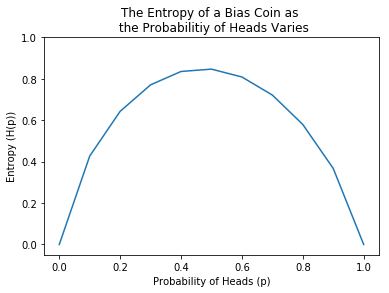

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
p = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
H = [-(p*np.log2(p) + (1-p)*np.log(1-p)) for p in p]
# Replace nan output with 0
H = [0 if math.isnan(x) else x for x in H]

plt.plot(p,H)
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1])
plt.xlabel('Probability of Heads (p)')
plt.ylabel('Entropy (H(p))')
plt.title('The Entropy of a Bias Coin as \n the Probabilitiy of Heads Varies')

### Basic property 3: Entropy is measured in bits, if we use log base 2

![%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202023-03-12%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%2011.51.29.png](attachment:%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202023-03-12%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%2011.51.29.png)

---
## VII. Entropy of Language

### 1. Entropy of a sequence of words:

\begin{equation}
    H(w_1 w_2 ... w_n) = - \sum_{w_1...wn} P(w_1 ... w_n) log_2 P(w_1 ... w_n)
\end{equation}

### 2. The per-word entropy rate of a sequence of words

\begin{equation}
    \frac{1}{n} H(w_1 w_2 ... w_n) = \frac{-1}{n} \sum_{w1...wn} P(w_1 ... w_n) log_2 P(w_1 ... w_n),2)
\end{equation}

### 3. Entropy of a language $L = \{w_1 ... w_n | 1 < n < \infty\}$:

\begin{equation}
    H(L) = - \lim_{n\to\infty} \frac{1}{n} H(w_1 ... w_n)
\end{equation}

![%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-04-04%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2010.08.48.png](attachment:%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-04-04%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2010.08.48.png)


### Defn: Cross Entropy

The cross entropy, H(p,m), of a true distribution **p** and a model distribution **m** is defined as:

\begin{equation}
    H(p,m) = - \sum_{x} p(x) log_2 m(x)
\end{equation}


The lower the cross entropy is the closer it is to the true distribution.

### Defn: Cross Entropy of a Sequence of Words

\begin{equation}
    H(p,m) = - \lim_{n\to\infty} \frac{1}{n} \sum_{w1...wn} p(w_1 ... w_n) log_2 m(w_1 ... w_n)
\end{equation}

![%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-04-04%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2010.03.38.png](attachment:%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-04-04%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2010.03.38.png)



---


## VIII. Perplexity and Entropy

![%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-04-04%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2010.12.13.png](attachment:%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-04-04%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2010.12.13.png)



![%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-04-04%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2010.12.54.png](attachment:%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-04-04%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2010.12.54.png)

### Cross-Entropy Loss Function

- Also called logarithmic loss, log loss or logistic loss. Each predicted class probability is compared to the actual class desired output 0 or 1 and a score/loss is calculated that penalizes the probability based on how far it is from the actual expected value.
- The penalty is logarithmic in nature yielding a large score for large differences close to 1 and small score for small differences tending to 0.

- Consider a 4-class classification task where an image is classified as either a dog, cat, horse or cheetah.
<img src="https://miro.medium.com/max/1400/1*KvygqiInUpBzpknb-KVKJw.jpeg" witdth="60%">

- In the above Figure, Softmax converts logits into probabilities.
- The purpose of the Cross-Entropy is to take the output probabilities (P) and measure the distance from the truth values (as shown in Figure below).

<img src="https://miro.medium.com/max/882/1*rcvGMOuWLMpnNvJ3Oj7fPA.jpeg" witdth="60%">

- For the example above the desired output is [1,0,0,0] for the class dog but the model outputs [0.775, 0.116, 0.039, 0.070] .

- The objective is to make the model output be as close as possible to the desired output (truth values).
- During model training, the model weights are iteratively adjusted accordingly with the aim of minimizing the Cross-Entropy loss.
- The process of adjusting the weights is what defines model training and as the model keeps training and the loss is getting minimized, we say that the model is learning.

- Cross-entropy loss is used when adjusting model weights during training.
- The aim is to minimize the loss, i.e, the smaller the loss the better the model. A perfect model has a cross-entropy loss of 0.
- Cross-entropy is defined as

<img src="https://miro.medium.com/max/1400/1*1WRlyVw_sQNiPDPYAIXf9A.png" witdth="60%">


#### Binary Cross-Entropy Loss
- For binary classification, we have binary cross-entropy defined as

<img src="https://miro.medium.com/max/1400/1*xIB2OxbTmjFtHGE8UTLllw.png" witdth="60%">
- Binary cross-entropy is often calculated as the average cross-entropy across all data examples
<img src="https://miro.medium.com/max/1400/1*LTGc4T0NKn0b8YUAqzRTMg.png" witdth="60%">

#### Example
- Consider the classification problem with the following Softmax probabilities (S) and the labels (T).
- The objective is to calculate for cross-entropy loss given these information.

<img src="https://miro.medium.com/max/882/1*rcvGMOuWLMpnNvJ3Oj7fPA.jpeg" witdth="60%">

- The categorical cross-entropy is computed as follows

<img src="https://miro.medium.com/max/1400/1*Z-pih_yOYXuEYwimEj7HfQ.png" witdth="60%">

- Softmax is continuously differentiable function.
- This makes it possible to calculate the derivative of the loss function with respect to every weight in the neural network.
- This property allows the model to adjust the weights accordingly to minimize the loss function (model output close to the true values).
- Assume that after some iterations of model training the model outputs the following vector of logits

<img src="https://miro.medium.com/max/994/1*MdS4M50j9Cn9GVdO-tdoXg.png" witdth="60%">

<img src="https://miro.medium.com/max/1400/1*WWibqonxKWdqQrU11ctqqA.png" witdth="60%">

- 0.095 is less than previous loss, that is, 0.3677 implying that the model is learning.
- The process of optimization (adjusting weights so that the output is close to true values) continues until training is over.


---
---

# Part 3
---
## Challenges in Fitting LMs

Due to the output of LMs is dependent on the training corpus, N-grams only work well if the training corpus is similar to the testing dataset and we risk overfitting in training.

As with any machine learning method, we would like results that are generalisable to new information.

Even harder is how we deal with words that do not even appear in training but are in the test data.

![%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202020-09-28%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%209.33.19.png](attachment:%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202020-09-28%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%209.33.19.png)

![%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202020-09-28%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%209.32.01.png](attachment:%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202020-09-28%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%209.32.01.png)

## IX. Dealing with Zero Counts in Training: Laplace +1 Smoothing

To deal with words that are unseen in training we can introduce add-one smoothing. To do this, we simply add one to the count of each word.

This shifts the distribution slightly and is often used in text classification and domains where the number of zeros isn't large. However, this is not often used for n-grams, instead we use more complex methods.




### Adjusted Counting

- I added Adjusted count for better understanding
![%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202020-09-21%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.43.40.png](attachment:%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202020-09-21%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.43.40.png)

![%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202020-09-21%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.43.53.png](attachment:%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202020-09-21%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.43.53.png)


![%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-04-21%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.43.06.png](attachment:%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-04-21%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.43.06.png)

![%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-04-21%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.44.17.png](attachment:%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-04-21%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.44.17.png)

![%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-04-21%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.45.15.png](attachment:%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-04-21%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.45.15.png)

![%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-04-21%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.45.48.png](attachment:%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-04-21%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.45.48.png)

![%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-04-21%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.46.17.png](attachment:%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-04-21%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.46.17.png)

![%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-04-21%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.47.01.png](attachment:%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-04-21%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.47.01.png)

### X. Futher Smoothing Methods

Laplace +1 smoothing is used in text classification and domains where the number of zeros isn't large. However, it is not often used for n-grams, some better smothing methods for n-grams are:

- Add-k Laplace Smoothing
- Good-Turing
- Kenser-Ney
- Witten-Bell


---
---
# Part 4

## Selecting the Language Model to Use

We have introduced the first three LMs (unigram, bigram and trigram) but which is best to use?

Trigrams are generally provide better outputs than bigrams and bigrams provide better outputs than unigrams but as we increase the complexity the computation time becomes increasingly large. Furthermore, the amount of data available decreases as we increase n (i.e. there will be far fewer next words available in a 10-gram than a bigram model).

## XI. Back-off Method: Use trigrams (or higher n model) if there is good evidence to, else use bigrams (or other simpler n-gram model).

## XII. Interpolation: Use a mixture of n-gram models

### Defn: Simple Interpolation:

\begin{equation}
    P(w_3|w_1,w_2) = \lambda_1 P(w3|w_1,w_2) + \lambda_2 P(w_3|w_2) + \lambda_3 P(w_3)
\end{equation}

where $\sum_{i} \lambda_i = 1$.

### Defn: Contidional Context Interpolation:

\begin{equation}
    P(w_3|w_1,w_2) = \lambda_1 (w_{1}^{2})P(w3|w_1,w_2) + \lambda_2 (w_{1}^{2})P(w_3|w_2) + \lambda_3 (w_{1}^{2})P(w_3)
\end{equation}


### Calculating $\lambda$s:

Using a held-out subset of the corpus (validation set), find $\lambda$s that maximise the probability of the held out data:

\begin{equation}
    P(w_1,w_2,...,w_n|M(\lambda_1,\lambda_2,...,\lambda_k)) = \sum_i log P_{M(\lambda_1,\lambda_2,...,\lambda_k)}(w_i|w_{i-1})
\end{equation}

Where unknown words are assigned an unknown word token '< Unk >'.


### Small Interpolation Example

Say we are given the following corpus:

- < s I am Sam /s >
- < s Sam I am /s >
- < s I am Sam /s >
- < s I do not like green eggs and Sam /s >

Using linear interpolation smoothing with a bigram and unigram model with $\lambda_1 = \frac{1}{2}$ and $\lambda_2 = \frac{1}{2}$, what is $P(Sam|am)$? (note: include '< s' and '/s >' in calculations)

Using the following equation:

\begin{equation}
    P(w_2|w_1) = lambda_1 P(w_2|w1) + lambda_2 P(w2)
\end{equation}

We have in our case:

\begin{equation}
    P(Sam|am) = \frac{1}{2} P(Sam|am) + \frac{1}{2} P(Sam)
\end{equation}

where

\begin{equation}
    P(Sam|am) = \frac{count(am, Sam)}{count(am)} = \frac{2}{3}
\end{equation}

and

\begin{equation}
    P(Sam) = \frac{count(Sam)}{Total \ num \ words} = \frac{4}{25}
\end{equation}

Therefore,

\begin{equation}
    P(Sam|am) = \frac{1}{2}*\frac{2}{3} + \frac{1}{2}*\frac{4}{25} \approx 0.413
\end{equation}

